<p  style="font-size: 29px; font-family: Arial; font-weight: bold;">Chapter 2. End-to-End Machine Learning Project</p>
<hr>

<br>
<p style="font-size: 24px; font-family: Times New Roman;">List of content:</p>

 1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.


<p style="font-size:30px"> By Ahmad Al-qaisi</p>
<p style="font-size:30px"> 25th April, 2024</p>

<hr>

Starting with:

<p class="heading">Working with Real Data</p>

Unreliable data, then unreliable results!

It's all about data and data reliablity. The more high quality data we have, the more confidence we can have in our decisions. <br>It starts with the data source and what makes it a **good data source** or **bad data source**.

But wait, what is good? No, really, I want to know: **What is good?**
If I ask you about your favorite type of ice cream, it may not be my favorite because **good is subjective**.

So what about good data sources? Are those subjective, too? In some ways they are, but luckily, there's some best practices to follow that'll help you measure the reliability of data sets before you use them.

A process so called **ROCCC**:<br>
**R**eliable: accurate, complete and unbiased information that's been vetted and proven fit for use.<br>
**O**riginal: be sure to validate it with the original source.<br>
**C**omprehensive: The best data sources contain all critical information needed to answer the question or find the solution.<br>
**C**urrent: the data must be current and up to date. The usefulness of data decreases as time passes.<br>
and **C**ited.<br><br>

There's lots of places that are known for having good data. Your best bet is to go with the vetted public data sets, like those published in <a style="color: #85200c" href="https://archive.ics.uci.edu/datasets" target="_blank">UC Irvine Machine Learning Repository</a>, 
<a href="https://www.kaggle.com/datasets" style="color: #85200c" target="_blank">Kaggle datasets</a>, 
<a href="https://registry.opendata.aws/" style="color: #85200c" target="_blank">Amazon’s AWS datasets</a>, academic papers, financial data, and governmental agency data.
<br><br>
In our project, we’ll use the California Housing Prices dataset from the StatLib. <br>This dataset is based on data from the 1990 California census. It is not exactly recent, but it has many qualities for learning.



<p class="heading">Look at the Big Picture</p>

Our first task is to
use California census data to build a model of housing prices in the state. <br>This
data includes metrics such as the *population*, *median income*, and *median
housing price* for each block group in California.
<br><br>
Our model should learn from this data and be able to predict the *median
housing price* in any district, given all the other metrics.
<br><br>
Our first task is to do:
<p class="sub-heading">Frame the Problem<p>
 
First, you need to frame the problem: is it supervised, unsupervised, orReinforcement Learning? Is it a classification task, a regression task, or
something else? Should you use batch learning or online learning techniques?
Before you read on, pause and try to answer these questions for yourself.
Have you found the answers?<br><br>
    
Let’s see: it is clearly a typical supervised
learning task, since you are given *labeled* training examples (median housing price). It is
also a typical regression task, since you are asked to predict a value. More
specifically, this is a *multiple regression* problem, since the system will use
multiple features to make a prediction. It is also a *univariate regression* problem, since we are
only trying to predict a single value for each district.<br><br>
Finally, there is no continuous flow of data coming into the system,
there is no particular need to adjust to changing data rapidly, and the data is
small enough to fit in memory, so plain batch learning should do just fine.<br><br>

<p class="sub-heading">Select a Performance Measure</p>

Some of typical performance measures for regression problems are the Root Mean Square Error (RMSE), mean absolute error(MAE, also called average absolute deviation).
*<p class="eq">Equation 2-1. Root Mean Square Error (RMSE)</p>*
<p id="Equation 2-1">RMSE = $\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$</p>


*<p class="eq">Equation 2-2. Mean absolute error (MAE)</p>*
<p id="Equation 2-2">MAE = $\frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$</p>


All of these measures are based on computing the norm of the distance between predicted and actual values vectors <br>(ℓk norm(predicted - actual)).
The ℓk norm of vector $( \mathbf{v} ) = \| \mathbf{v} \|_k = \left( \sum_{i=1}^{n} |v_i|^k \right)^{\frac{1}{k}} .$
<br><br>Computing the root of a sum of squares (RMSE) corresponds to the *Euclidean norm*, it
is also called the ℓ2 norm.<br>
The same for Mean absolute error (MAE), it corresponds to computing *Manhattan norm*, it
is also called the ℓ1 norm:<br>
<img src="../images/norm_dis.png">
The distance between A and B, C, it is equal to the norm of that vector C. And we divide by n wo get the mean error, where the error here is the difference between the actual value and predicted one.<br><br>

<p class="heading">Get the Data</p>

<p class="sub-heading">Download the Data</p>

You could use your web browser to download the file and run: <p class="command">$ tar xzf housing.tgz </p> <p> in your terminal to decompress it and extract the CSV file.<br>
After you download it, you should read it as a `pandas DataFrame` object:

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
from sklearn import model_selection


df = pd.read_csv("../datasets/housing/housing.csv")

<br><br><p class="sub-heading">Take a Quick Look at the Data Structure</p>

Let’s take a look at the top five rows using the DataFrame’s `head()` method:

In [90]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<br><br>You can `info()` method to get a quick description of the data:

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


As you can see, there is 9 continuous attributes and categorical one (labelled as object).<br>
You can get a **five-number** summary by `describe()` method:

In [92]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


and for the `ocean_proximity` attribute by assigning the `object` value to `include` parameter:

In [93]:
df.describe(include="object")

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


You can explore it further by knowing the counts of each category using `value_counts()` method:

In [94]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Another quick way to get a feel of the type of data you are dealing with is to
plot a histogram for each numerical attribute using `hist()` method, be sure to install and import **matplotlib** module firstly:

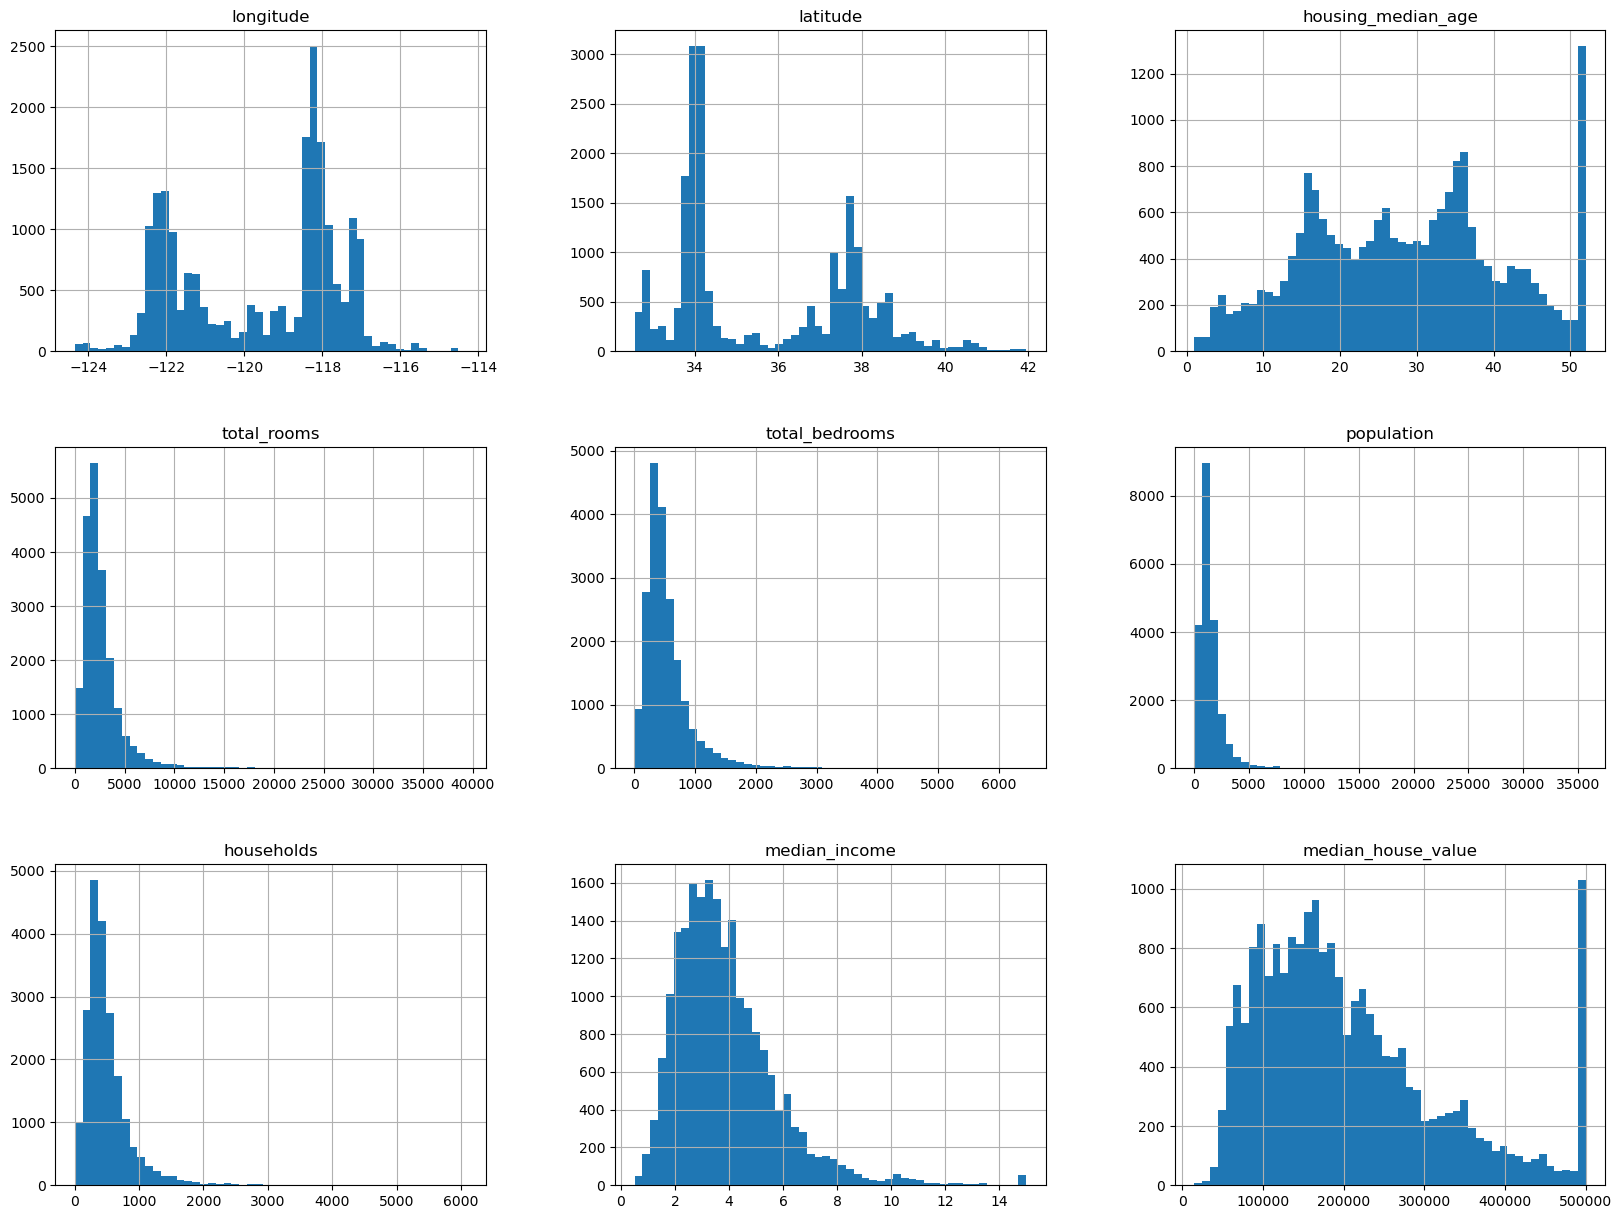

In [95]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

Do you see anything unusual here?<br><br>
Yup! The fitst thing you may notice is that many histograms are *tail-heavy*: they extend much farther to
the right of the median than to the left. This may make it a bit harder
for some Machine Learning algorithms to detect patterns. We will try
transforming these attributes later on to have more *bell-shaped*
distributions.

There are some *capped* attribute, `housing median age`, `median house` and `median income` value are capped.

Finally, these attributes have very different scales.

<p class="sub-heading">Create a Test Set</p>

You may wondering, as I did before, why do we split the data at this early stage from the project?
<br><br>
Well, we split the data at this early stage of the project to prevent a so called *data snooping* bais.<br>
Data snooping bias, also known as data mining bias or data dredging bias, occurs when decisions about a model are influenced by patterns or relationships found in the data after repeatedly analyzing it. <br><br>This bias arises when researchers or analysts explore datasets multiple times, potentially leading to the discovery of patterns that are mere coincidences or artifacts of the dataset rather than true insights.<br><br>

We can split data into two sets, *training dataset* and *testing dataset* using `train_test_split()` function by giving a ratio for test set, typically of 0.2 and it can be decreases if the dataset is too large, here is how to do that:

In [96]:
train_set, test_set = model_selection.train_test_split(df, test_size=0.2)
train_set.shape[0], test_set.shape[0], df.shape[0]

(16512, 4128, 20640)

Awesome!

<p class="heading">Discover and Visualize the Data to Gain
Insights<p>

Now, lets dive into a little more depth.

<p class="sub-heading">Visualizing Geographical Data</p>

Let's plot each district in a scatter plot:

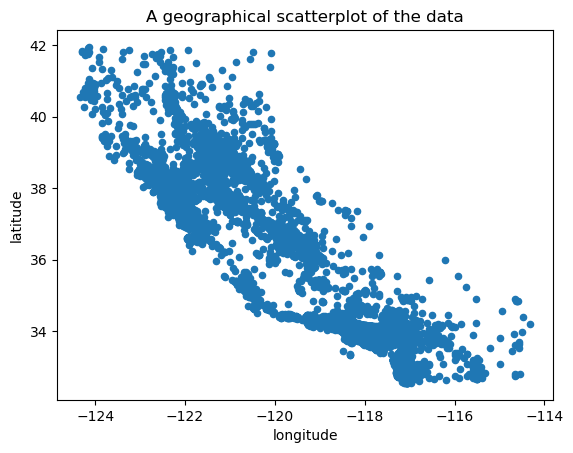

In [97]:
df = train_set.copy()
df.plot(kind="scatter", x="longitude", y="latitude", title="A geographical scatterplot of the data")
plt.show()

But it's look tricky to interpret, lets assign a 0.1 `alpha` value:

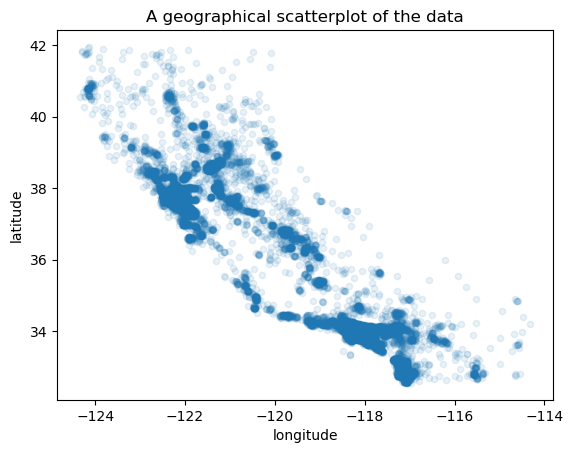

In [98]:
df.plot(kind="scatter", x="longitude", y="latitude", title="A geographical scatterplot of the data", alpha=0.1)
plt.show()

Nowو you can clearly see that there are some areas that are more dense than others.<br>
Let’s look at the housing prices. The radius of each circle
represents the district’s population (parameter `s`), and the color represents the price
(parameter `c`). We will use a predefined color map (parameter `cmap`) called `jet`, which
ranges from blue (low values) to red (high prices):

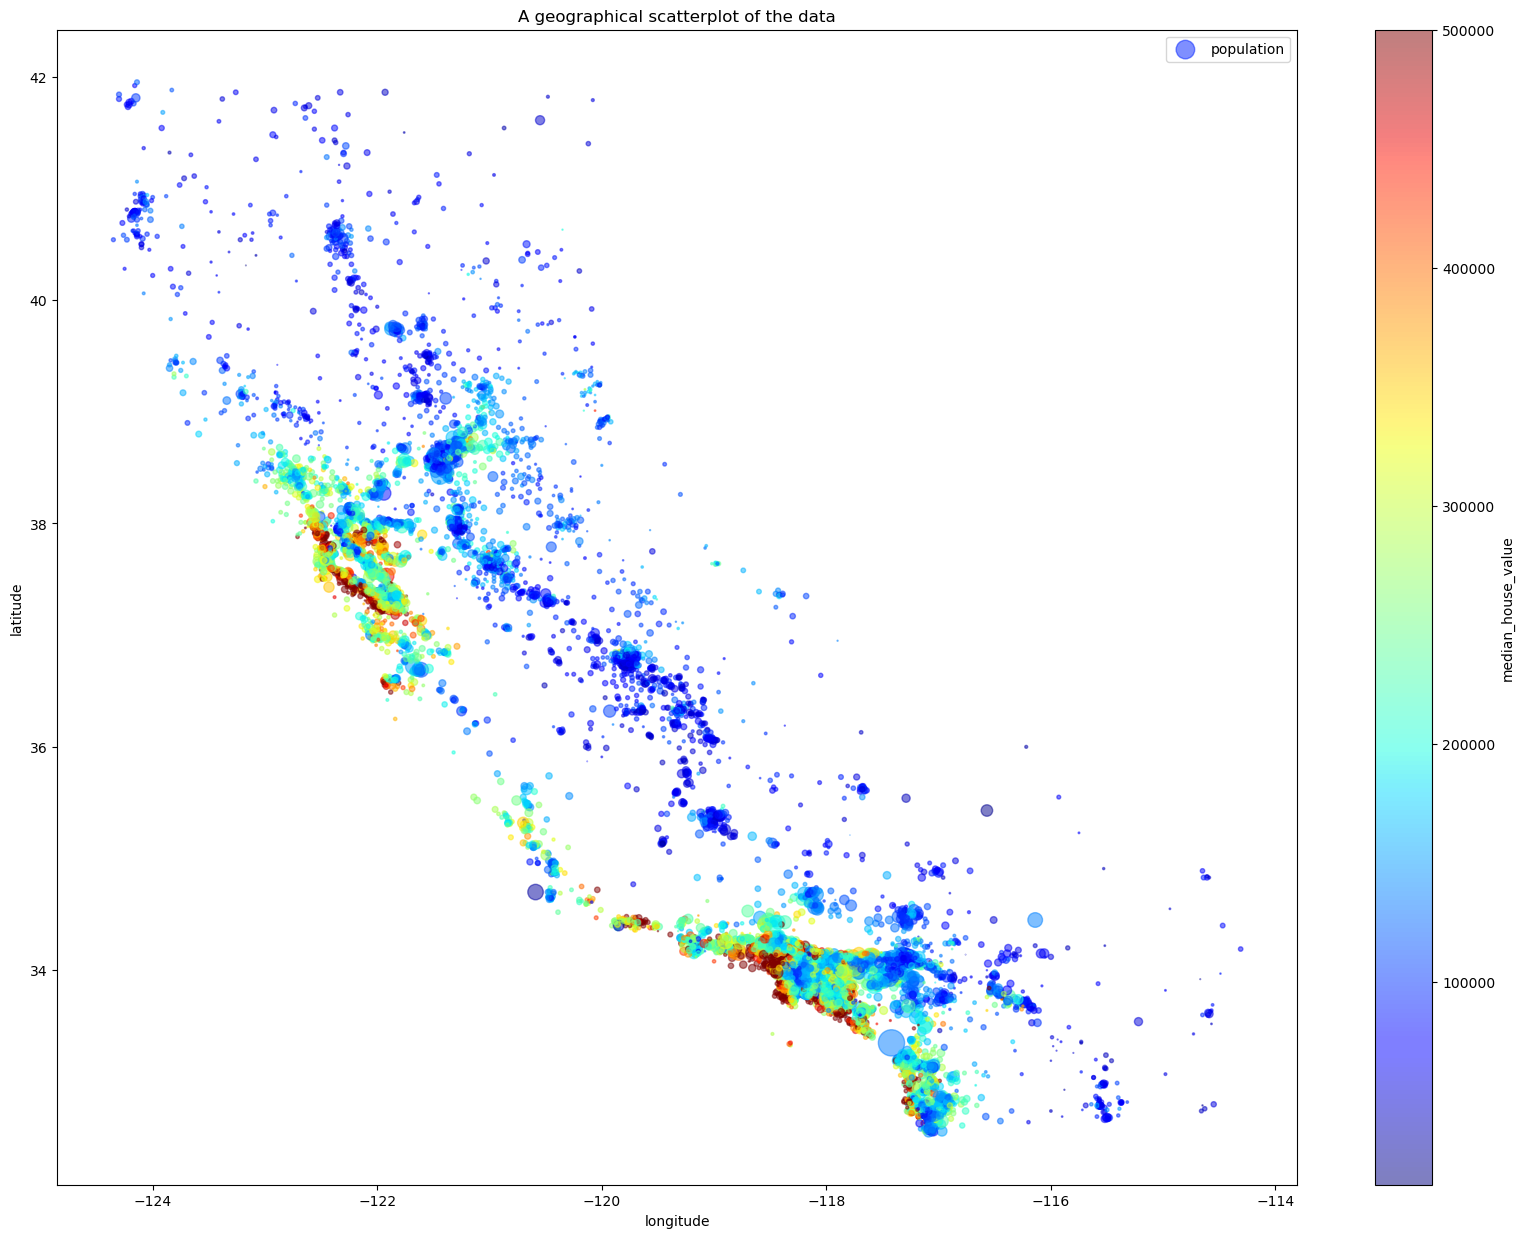

In [99]:
df.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    title="A geographical scatterplot of the data",
    colorbar=True,
    alpha=0.5,
    c="median_house_value",
    s=df["population"]/100,
    cmap=plt.get_cmap("jet"),
    label="population",
    figsize=(20, 15)
)
plt.legend()
plt.show()

This map tells us how the house prices are distributed, housing prices are very much related to the location (e.g., close to the ocean) and to the population density.<br><br>

Let's investigate it more in deep by computing the *standard
correlation coefficient* (Pearson's r) and plot a (correlation matrix).

<p class="sub-heading">Looking for Correlations</p>

Simply, by calling `corr` function. This function will return a correlation matrix of each attribute with others:

In [100]:
corr_matrix = df.drop("ocean_proximity", axis="columns").corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925133,-0.110765,0.044694,0.070215,0.099928,0.056865,-0.013965,-0.045218
latitude,-0.925133,1.000000,0.012703,-0.037835,-0.068908,-0.110056,-0.073279,-0.081075,-0.144024
housing_median_age,-0.110765,0.012703,1.000000,-0.358969,-0.318031,-0.294497,-0.301368,-0.109435,0.106923
total_rooms,0.044694,-0.037835,-0.358969,1.000000,0.929043,0.854250,0.917719,0.197971,0.138350
total_bedrooms,0.070215,-0.068908,-0.318031,0.929043,1.000000,0.874258,0.979855,-0.008630,0.054500
population,0.099928,-0.110056,-0.294497,0.854250,0.874258,1.000000,0.903521,0.003518,-0.022020
households,0.056865,-0.073279,-0.301368,0.917719,0.979855,0.903521,1.000000,0.012688,0.070889
median_income,-0.013965,-0.081075,-0.109435,0.197971,-0.008630,0.003518,0.012688,1.000000,0.689765
median_house_value,-0.045218,-0.144024,0.106923,0.138350,0.054500,-0.022020,0.070889,0.689765,1.000000


Note that Pearson's r looks for linear relationships, and gives a value in [-1, 1]. The sign indicates the direction of the relationship, and a value of zero means there is no linear relationship.<br><br>
Now, lets see how the house prices correlated with other attributes:

In [101]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689765
total_rooms           0.138350
housing_median_age    0.106923
households            0.070889
total_bedrooms        0.054500
population           -0.022020
longitude            -0.045218
latitude             -0.144024
Name: median_house_value, dtype: float64

The numbers gives us a strong and precise ideas, but sometimes it becomes hard to interpret these numbers and ideas, so, we use the power of visuals.<br><br>

Here, I'll use the `scatter_matrix()` pandas function which which plots every numerical attribute against
every other numerical attribute:

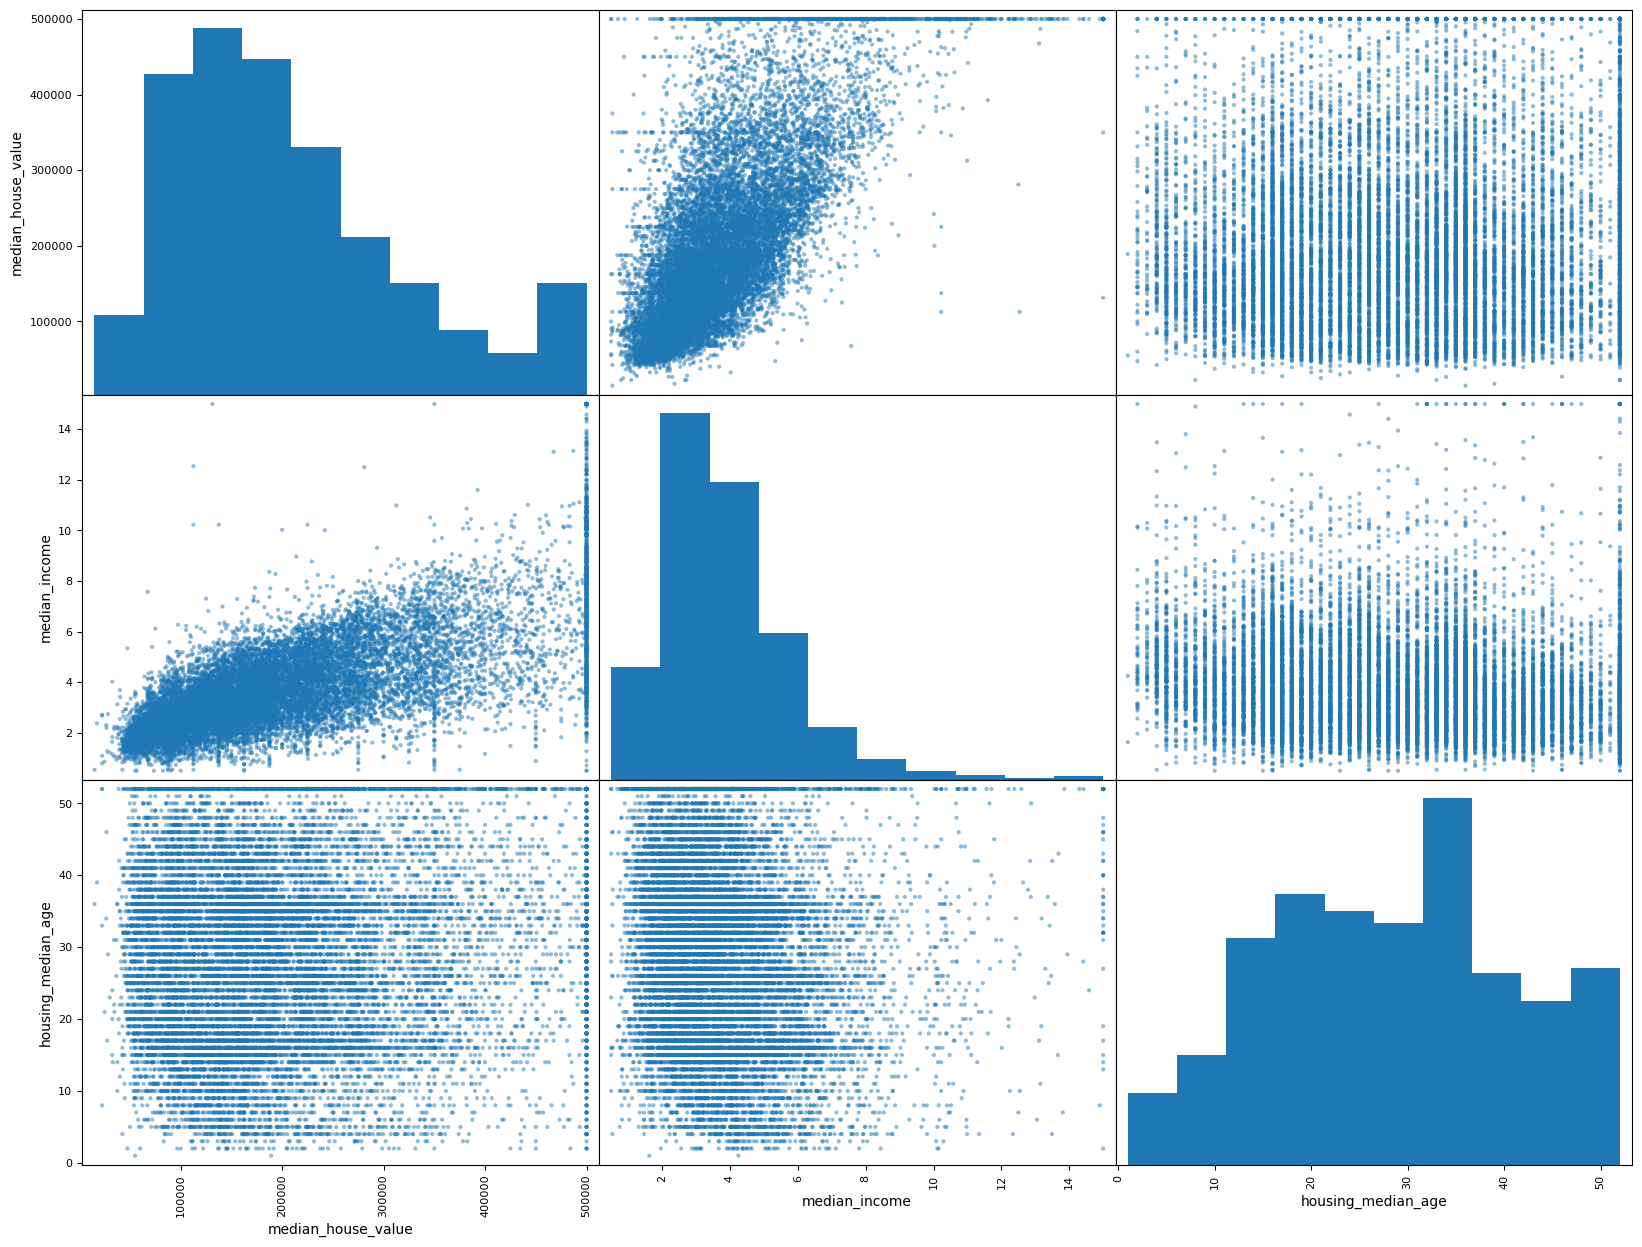

In [102]:
pd.plotting.scatter_matrix(df[["median_house_value", "median_income", "housing_median_age"]], figsize=(20, 15))
plt.show()

The main diagonal (top left to bottom right) would be full of straight lines if
pandas plotted each variable against itself, which would not be very useful. So
instead pandas displays a histogram of each attribute.<br><br>
The most promising attribute to predict the median house value is the median
income, so let’s zoom in on their correlation scatterplot:

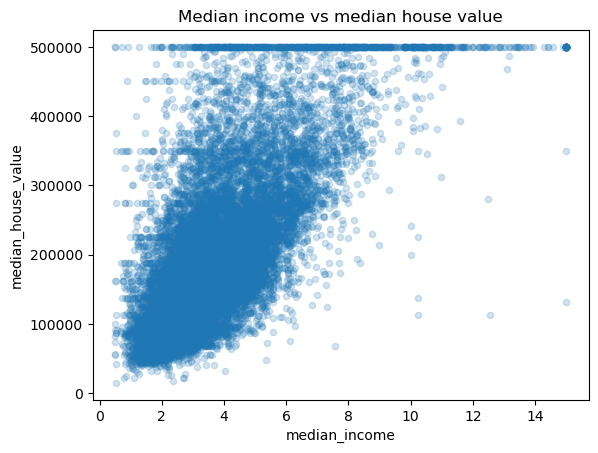

In [103]:
df.plot(kind="scatter", x="median_income", y="median_house_value", title="Median income vs median house value", alpha=0.2)
plt.show()

You can clearly see the strong reltionship between median income and house prices, as well as, the price cap that we noticed earlier is clearly visible as a horizontal line at $500,000, $400,000, $280,000, and may at $190,000.<br><br>
You may want to try removing the corresponding
districts to prevent your algorithms from learning to reproduce these data
quirks.

<br><p class=sub-heading>Experimenting with Attribute Combinations</p>

One last thing you may want to do before preparing the data for Machine
Learning algorithms is to try out various attribute combinations. <br><br>For example,
the total number of rooms in a district is not very useful if you don’t know how
many households there are. What you really want is the number of rooms per
household. <br>Similarly, the total number of bedrooms by itself is not very useful:
you probably want to compare it to the number of rooms. And the population
per household also seems like an interesting attribute combination to look at.<br><br>
Let’s create these new attributes, and then print out the correlation matrix around house prices:

In [104]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

df.drop("ocean_proximity", axis="columns").corr()["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.689765
rooms_per_household         0.170031
total_rooms                 0.138350
housing_median_age          0.106923
households                  0.070889
total_bedrooms              0.054500
population_per_household   -0.020462
population                 -0.022020
longitude                  -0.045218
latitude                   -0.144024
bedrooms_per_room          -0.256245
Name: median_house_value, dtype: float64

Really not bad! this reveals some other modirate relationships with `bedrooms_per_room` and `rooms_per_household`.
Obviously, the larger the houses, the more
expensive they are.

Moving toward a more interesting part of this project, **Data Preprocessing and preparation**.

<br><br><p class=heading>Prepare the Data for Machine Learning
Algorithms</p>

Put a mask, and let's clean up the dirt!<br><br>

But first let’s revert to a clean training set (by copying train_set once
again). <br>Let’s also separate the predictors and the labels, since we don’t
necessarily want to apply the same transformations to the predictors and the
target values:

In [105]:
df =  train_set.drop("median_house_value", axis=1)
df_labels = train_set.median_house_value.copy()

<p class=sub-heading>Data Cleaning</p>

We saw earlier that the
total_bedrooms attribute has some missing values, so let’s fix this. We can :<br>
<ol>
<li>drop the entire columns</li>
<li>drop the rows with missing values</li> <li>or subsitute artificial values(e.g. mean, median, zero, etc..)</li></ol>

In [106]:
df.dropna(subset="total_bedrooms") # option 1
df.drop("total_bedrooms", axis="columns") #option 2
MEDIAN_TOTAL_BEDROOMS = df["total_bedrooms"].median() # option 3
df.fillna(MEDIAN_TOTAL_BEDROOMS)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
9444,-119.82,37.57,13.0,1713.0,340.0,643.0,241.0,2.6620,INLAND
19309,-122.81,38.36,18.0,2399.0,389.0,1131.0,391.0,5.2769,<1H OCEAN
2028,-119.75,36.71,38.0,1481.0,434.0,1543.0,372.0,1.4577,INLAND
10481,-117.68,33.59,12.0,3473.0,466.0,1569.0,450.0,8.8636,<1H OCEAN
10541,-117.74,33.46,9.0,6564.0,1316.0,1720.0,904.0,4.8900,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
12707,-121.40,38.61,37.0,1994.0,347.0,782.0,355.0,4.1488,INLAND
15924,-122.44,37.72,52.0,1775.0,347.0,1102.0,367.0,4.3125,NEAR BAY
304,-122.18,37.77,42.0,1180.0,257.0,877.0,268.0,2.8125,NEAR BAY
13917,-116.05,34.12,19.0,301.0,65.0,150.0,56.0,3.1250,INLAND


Make use re to save the median you've completed, because you will need it again, to substitute in new instances with missing values of total bedrooms, or for train_set as examples.<br><br>

We can use sklearn to do such so as follow:

In [107]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
numarical_attributes = df.drop("ocean_proximity", axis="columns")
imputer.fit(numarical_attributes)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the
result in its `statistics_ instance` variable. <br><br>Only the total_bedrooms attribute
had missing values, but we cannot be sure that there won’t be any missing
values in new data after the system goes live, so it is safer to apply the imputer
to all the numerical attributes:

In [108]:
imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2129.    ,  434.    , 1167.5   ,
        410.    ,    3.5269])

In [109]:
numarical_attributes.median().values

array([-118.49  ,   34.25  ,   29.    , 2129.    ,  434.    , 1167.5   ,
        410.    ,    3.5269])

Now you can use this “trained” imputer to transform the training set by
replacing missing values with the learned medians:

In [110]:
imputed_numarical_attributes = imputer.transform(numarical_attributes)
imputed_numarical_attributes = pd.DataFrame(imputed_numarical_attributes, index=numarical_attributes.index, columns=numarical_attributes.columns)

<br><br><p class="sub-heading">Handling Text and Categorical Attributes</p>

Most Machine Learning algorithms prefer to work with numbers, so let’s convert
these categories from text to numbers using Scikit-Learn’s `OrdinalEncoder` class:

In [111]:
from sklearn.preprocessing import OrdinalEncoder
housing_cat = df[["ocean_proximity"]]
enc = OrdinalEncoder()
housing_cat = pd.DataFrame(enc.fit_transform(housing_cat), index=housing_cat.index, columns=housing_cat.columns) # it takse a 2d array like(e.g. pandas df) so, you can not feed a 1d array like (e.g pandas Series like train_set_copy.ocean_proximity.)
housing_cat

,ocean_proximity
9444,1.0
19309,0.0
2028,1.0
10481,0.0
10541,0.0
...,...
12707,1.0
15924,3.0
304,3.0
13917,1.0


But there is a problem here, suppose a dataset has a Gender column with categorical elements like Male and  Female. These labels have no specific order of preference and also since the data is string labels, machine learning models misinterpreted that there is some sort of hierarchy in them.

If you solve this problem as we did before like in ocean_proximity, for example Male and Female mapped to 0 and 1,  this can add bias in our model as it will start giving higher preference to the Female parameter as 1>0 but ideally, both labels are equally important in the dataset. To deal with this issue we will use the **One Hot Encoding** technique.
<br><br>By using one hot encoding technique we can avoid the problem of ordinality, meaning that, there is no one value is more important than other one, but it can lead to increased dimensionality, as a separate binary column is created for each category in the variable. 
<br><br>
Using up tons of
memory mostly to store zeros would be very wasteful, so instead a sparse
matrix only stores the location of the nonzero elements, which `OneHotEncoder()` class do, by returning a SciPy `sparse matrix` which can be used as a normal numpy 2d array:

In [112]:
from sklearn.preprocessing import OneHotEncoder
housing_cat = df[["ocean_proximity"]]
enc = OneHotEncoder()
housing_cat = enc.fit_transform(housing_cat)
print(housing_cat[:5])

  (0, 1)	1.0
  (1, 0)	1.0
  (2, 1)	1.0
  (3, 0)	1.0
  (4, 0)	1.0


or convert it to numpy array:

In [113]:
housing_cat.toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

<p class=sub-heading>Custom Transformers</p>

Instead of adding the new columns manully as we feed the system with new data, we can automate this work, and later on add it to our finle `pipeline` system, consider this class:

In [114]:
from sklearn.base import BaseEstimator, TransformerMixin


rooms_ix, bedrooms_ix, population_ix, households_ix = (list(df.columns).index(col) for col in ('total_rooms', 'total_bedrooms', 'population', 'households'))

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self # nothing else to do
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

The `CombinedAttributesAdder` class does this tedious task for us, instead of doing it manually every time we feed the system with new data:


In [115]:
attr_adder = CombinedAttributesAdder()
attr_adder.fit_transform(df.values)

array([[-119.82, 37.57, 13.0, ..., 7.1078838174273855, 2.66804979253112,
        0.198482194979568],
       [-122.81, 38.36, 18.0, ..., 6.135549872122762, 2.8925831202046037,
        0.16215089620675283],
       [-119.75, 36.71, 38.0, ..., 3.9811827956989245, 4.147849462365591,
        nan],
       ...,
       [-122.18, 37.77, 42.0, ..., 4.402985074626866, 3.2723880597014925,
        0.21779661016949153],
       [-116.05, 34.12, 19.0, ..., 5.375, 2.6785714285714284,
        0.2159468438538206],
       [-118.12, 33.96, 34.0, ..., 6.143776824034335, 2.667381974248927,
        0.1575270695075096]], dtype=object)

<p class=sub-heading>Feature Scaling</p>

One of the most important transformations you need to apply to your data is
*feature scaling*. With few exceptions, Machine Learning algorithms don’t
perform well when the input numerical attributes have very different scales.
This is the case for the housing data: the total number of rooms ranges from
about 6 to 39,320, while the median incomes only range from 0 to 15. <br><br>
There are two common ways to get all attributes to have the same scale: 1- *min-
max scaling*, in which all values are transformed in range of [0, 1], by subtract *min* and devide by *(max-min)* and 2- *standardization*, *z-score normalization* by subtract the *mean* and devide by *std*. <br><br>Standardization does not bound values to a specific range, as in min-max scaling, which may be a
problem for some algorithms (e.g., neural networks often expect an input value
ranging from 0 to 1).<br>However, standardization is much less affected by
outliers unlike min-max scaling.

In [116]:
from sklearn.preprocessing import StandardScaler


std_scaler = StandardScaler()
std_scaler.fit_transform(df.drop("ocean_proximity", axis=1))

array([[-0.1262895 ,  0.90868323, -1.2495726 , ..., -0.69479523,
        -0.6754492 , -0.6294625 ],
       [-1.61677383,  1.27822317, -0.8502619 , ..., -0.2625824 ,
        -0.28448063,  0.74083857],
       [-0.09139522,  0.50639925,  0.74698089, ...,  0.10231859,
        -0.33400331, -1.26055875],
       ...,
       [-1.3027253 ,  1.00223765,  1.06642945, ..., -0.48754564,
        -0.60507486, -0.55059512],
       [ 1.75301683, -0.70513042, -0.77039976, ..., -1.13143646,
        -1.15764378, -0.38683395],
       [ 0.72114306, -0.77997395,  0.42753233, ..., -0.16338602,
        -0.08899634,  1.1576566 ]])

<p class=sub-heading>Transformation Pipelines</p>

A pipeline refers to a sequence of data processing and modeling steps that are chained together in a specific order to form a cohesive workflow, such that the output of one phase is the input of the following one.<br><br>Here is a small pipeline
for the numerical attributes:

In [117]:
from sklearn.pipeline import Pipeline


num_atts = list(df.columns)
num_atts.remove("ocean_proximity")
cat_atts = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler())
])

num_pipeline.fit_transform(df[num_atts])

array([[-0.1262895 ,  0.90868323, -1.2495726 , ..., -0.69479523,
        -0.6754492 , -0.6294625 ],
       [-1.61677383,  1.27822317, -0.8502619 , ..., -0.2625824 ,
        -0.28448063,  0.74083857],
       [-0.09139522,  0.50639925,  0.74698089, ...,  0.10231859,
        -0.33400331, -1.26055875],
       ...,
       [-1.3027253 ,  1.00223765,  1.06642945, ..., -0.48754564,
        -0.60507486, -0.55059512],
       [ 1.75301683, -0.70513042, -0.77039976, ..., -1.13143646,
        -1.15764378, -0.38683395],
       [ 0.72114306, -0.77997395,  0.42753233, ..., -0.16338602,
        -0.08899634,  1.1576566 ]])

So far, we have handled the categorical columns and the numerical columns
separately. It would be more convenient to have a single transformer able to
handle all columns, applying the appropriate transformations to each column. In
version 0.20, Scikit-Learn introduced the `ColumnTransformer` for this purpose,
and the good news is that it works great with pandas `DataFrames`. Let’s use it to
apply all the transformations to the housing data:

In [118]:
from sklearn.compose import ColumnTransformer


full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_atts),
    ("cat", OneHotEncoder(), cat_atts)
])

prepared_df = full_pipeline.fit_transform(df)

Now, we have a thoroughly prepared dataset, ready for ML projects. Moreover, our pipeline streamlines these preprocessing tasks, eliminating the need for repetitive revisitation each time we input new data into the system.

<p class=heading>Select and Train a Model</p>

At this point, you **prepared** the data and fetched it from its source, you **discover** the data and plot it to gain a quick idea about your dataset, you **process** the data such that it is ready for ml project, and lastly you build a **pipeline** that streamline the preprocessing steps you did it so for.

Now, it's time to select the best fit model for this problem, score it's performance, fine tune it's parameters, and deploy it!

<p class=sub-heading>Training and Evaluating on the Training Set</p>

Let’s first train a `Linear Regression` model, like we did in the previous chapter:

In [119]:
from sklearn.linear_model import LinearRegression


lm = LinearRegression()
lm.fit(prepared_df, df_labels)

LinearRegression()

Pretty cool! we have just trained a Linear Regression model, now let’s try it out on a
few instances from the training set and see how it performs:

In [123]:
some_data = df.iloc[:5]
some_labels = df_labels.iloc[:5]
some_prepared_data = full_pipeline.transform(some_data)

print("Predicted: ", list(lm.predict(some_prepared_data)))
print("Actual: ", list(some_labels))

Predicted:  [75798.63444492401, 273510.2224685871, 57582.82706086227, 378151.4910664878, 300228.65834973933]
Actual:  [92400.0, 293900.0, 49800.0, 314000.0, 454100.0]


It's better than nothing.<br>
Let’s measure this regression model’s
RMSE on the whole training set:

In [127]:
from sklearn.metrics import mean_squared_error

lin_mse = np.sqrt(mean_squared_error(df_labels, lm.predict(prepared_df)))
lin_mse

68671.96706954652

Most districts’
median_housing_values range between $120,000 and $265,000 so a typical
prediction error of $68,628 is not very satisfying. This is an example of a *model
underfitting* the training data.<br><br>
When this happens it can mean that the features
do not provide enough information to make good predictions, or that the model
is not powerful enough.<br><br>
To resolve this problem, we should try more complex model, or add some other better features, so lets try other model:

In [129]:
from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor()
tree_reg.fit(prepared_df, df_labels)

DecisionTreeRegressor()

and let's find it's RMSE:

In [130]:
tree_reg_mse = np.sqrt(mean_squared_error(df_labels, tree_reg.predict(prepared_df)))
tree_reg_mse

0.0

It's absolutly overfit the traning data, but how
can you be sure? <br>As we saw earlier, you don’t want to touch the test set until
you are ready to launch a model you are confident about, so you need to use
part of the training set for training and part of it for model validation.

<p class=sub-heading>Cross-Validation</p>

The idea of *cross-validation* simply is that we partitioning the entire traing data into smaller *k* distinct training sets, called *folds*, and train the model k times, such that in each time it uses k-1 folds as traing set and the last one for validation:

In [145]:
from sklearn.model_selection import cross_val_score


def scores_info(scores, display_scores=True):
    if display_scores:
        print(f"Scores: {scores}\n")
    print(f"Mean: {scores.mean()}")
    print(f"Std: {scores.std()}")

scores = cross_val_score(
    tree_reg, 
    prepared_df,
    df_labels,
    cv=10,
    scoring="neg_mean_squared_error" # negative mean squared error
)

scores = np.sqrt(-scores)
scores_info(scores)

Scores: [67591.19677705 73960.18741237 63581.68446048 69605.23605776
 69106.13414288 66387.39582974 65724.06697647 65478.9080843
 68565.78133978 68228.92959799]

Mean: 67822.95206788249
Std: 2705.699672602085


Now these results are somewhat more reasonable than they were before.
We have sure now that our model, tree_reg, is over fit the training set, let's try one last model `RandomForestRegressor`.<br><br>
As you might guess, it is a special rainforest of regression trees. This kind of *hybrid* structure is known as <br>*Ensemble Learning*, where more than one of model is used.

In [151]:
from sklearn.ensemble import RandomForestRegressor


forest_reg = RandomForestRegressor()
forest_reg.fit(prepared_df, df_labels)

scores = cross_val_score(
    forest_reg, 
    prepared_df,
    df_labels,
    cv=10,
    scoring="neg_mean_squared_error" # negative mean squared error
)

scores = np.sqrt(-scores)
forest_mse = np.sqrt(mean_squared_error(df_labels, forest_reg.predict(prepared_df)))

scores_info(scores)
print(f"RMSE: {forest_mse}\n")

Scores: [48827.31790228 51424.50825211 44958.90876812 49134.33356237
 47835.80470948 49345.60654996 48062.07172651 47207.44417514
 50061.99626682 46544.956547  ]

Mean: 48340.29484597915
Std: 1750.0642599484206
RMSE: 17963.791197461996



This is much better: Random Forests look very promising.<br>However, note
that the score on the training set is still much lower than on the validation sets,
meaning that the model is still overfitting the training set.<br><br>Before you dive much deeper into Random Forests,you should try out many other models from various categories. The goal is to shortlist a few (two to five)
promising models.


Save your model now for later use if needed:

In [152]:
import joblib

joblib.dump(forest_reg, "forest_reg.pkl")
# forest_reg = joblib.load("forest_reg.pkl") to load it.

['forest_reg.pkl']

<p class=heading>Fine-Tune Your Model</p>

Fine-tuning a model refers to the process of adjusting and optimizing a pre-trained model.<br>
Let’s look at a few ways you can do that.

<p class=sub-heading>Grid Search</p>

One option would be to fiddle with the hyperparameters manually, until you
find a great combination of hyperparameter values:

In [158]:
from sklearn.model_selection import GridSearchCV


param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(
    forest_reg, param_grid, cv=10,
    scoring='neg_mean_squared_error',
    return_train_score=True
)

grid_search.fit(prepared_df, df_labels)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

This will tell sklearn to try the first 3x4 combinations of *n_estimators* and *max_features* hyperparameters from this first dict, and the same for second one with 2x3 combinations with bootstrap set to False.

This means there are 18 combination of *RandomForestRegressor* hyperparameter values with 10 folds (i.e. 18x10 rounds of training!)

It may take quite a long time, but
when it is done you can get the best combination of parameters like this:

In [166]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

<p class=sub-heading>Randomized Search</p>

Used when hyperparameter search space is large, using `RandomizedSearchCV()` class.


This class can be used in much the same way as the GridSearchCV class, but
instead of trying out all possible combinations, it evaluates a given number of
random combinations by selecting a random value for each hyperparameter at
every iteration.

<p class=sub-heading>Ensemble Methods</p>

Another way to fine-tune your system is to try to combine the models that
perform best. Just like Random Forests perform better than the individual
Decision Trees they rely on.

This will be very useful if the individual models make very
different types of errors.

<p class=sub-heading>Analyze the Best Models and Their Errors</p>

By analyzing what factors may affect on the performance of the trained model. <br>
Let’s display these importance scores next to their corresponding attribute
names:

In [174]:
feature_importances = grid_search.best_estimator_.feature_importances_
num_atts.extend(["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"])
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_atts = list(cat_encoder.categories_[0])
all_atts = num_atts + cat_one_hot_atts
sorted(zip(feature_importances, all_atts))

[(0.00027421110043739864, 'bedrooms_per_room'),
 (0.00216943308130778, 'rooms_per_hhold'),
 (0.006519055281814971, 'pop_per_hhold'),
 (0.007950181371375101, 'rooms_per_hhold'),
 (0.023946322838402423, 'households'),
 (0.025455305481005764, 'total_bedrooms'),
 (0.0269669377822604, 'total_rooms'),
 (0.03693758979873544, 'population'),
 (0.04642287777834719, 'housing_median_age'),
 (0.1032902504516596, 'latitude'),
 (0.1162096639768467, 'longitude'),
 (0.15919803828634888, 'pop_per_hhold'),
 (0.4446601327714584, 'median_income')]

With this information, you may want to try dropping some of the less useful
features, you maight look at the specific errors that your system makes, then try to
understand why it makes them and what could fix the problem, adding extra
features or getting rid of uninformative ones, cleaning up outliers, etc.

<p class=sub-heading>Evaluate Your System on the Test Set</p>

There is nothing special about this process; just get the predictors and
the labels from your test set, run your full_pipeline to transform the data
and evaluate the final model on the test set:

In [176]:
final_model = grid_search.best_estimator_

x_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

x_test_prepared = full_pipeline.transform(x_test)

final_predictions = final_model.predict(x_test_prepared)

final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
final_rmse

50462.18363278172

Now comes the project prelaunch phase: you need to present your solution, document
everything, and create nice presentations with clear visualizations and easy-to-
remember statements.


In this California housing example, the final performance of
the system is not better than the experts’ price estimates, which were often off
by about 20%, but it may still be a good idea to launch it, especially if this frees
up some time for the experts so they can work on more interesting and
productive tasks.

<p class=heading>Launch, Monitor, and Maintain Your System</p>

To prepare your solution for production, you'll need to polish the code, write documentation, and conduct tests. Once ready, you can deploy your model using various methods, such as saving it with joblib and loading it within your production environment. Alternatively, you can wrap the model in a dedicated web service accessible through a REST API, or deploy it on a cloud platform like Google Cloud AI Platform.


However, deployment is not the end. Monitoring the model's live performance is crucial. This can involve tracking downstream metrics or human analysis, depending on the application. Regular updates and retraining are necessary, which can be automated to streamline the process.


Evaluation of data quality, maintaining backups of models and datasets, and having processes in place for failure management are also essential aspects of maintaining a machine learning system in production.



<p class=heading>Conclusion</p>

In conclusion, building and deploying machine learning models involves significant infrastructure and effort, but once established, the process becomes more streamlined, enabling faster iterations from idea to production.








In [1]:
from IPython.display import HTML

css = """
<style>
    p {
        font-size: 20px; 
        font-family: Times New Roman;
    }
    .heading{
        font-weight: bold;
        font-family: Arial;
        font-size: 26px;
        color: #85200c;
    }
    .sub-heading{
        font-weight: bold;
        font-family: Arial;
        font-size: 24px;
    }
    li{
        font-size: 20px; 
        font-family: Times New Roman;
    }
    hr{
        height: 1px
    }
    .eq {
        font-weight: italic;
        font-size: 16px;
    }
    .command{
        font-family: Arial;
        font-size: 20px;
    }
</style>
"""

html = HTML(css)
html
